### Introduction to Reinforcement Learning 

#### Projet Labyrinthe
  
- Lath Essoh

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [49]:
class Maze:
    def __init__(self, maze, start_position, goal_position):
        # Initialisons l'objet Maze avec le labyrinthe fourni, la position de départ et la position de but
        self.maze = maze
        self.maze_height = maze_layout.shape[0]  # Obtenons la hauteur du labyrinthe (nombre de lignes)
        self.maze_width = maze_layout.shape[1]   # Obtenons la largeur du labyrinthe (nombre de colonnes)
        self.start_position = start_position     # Définissons la position de départ dans le labyrinthe sous forme de tuple (x, y)
        self.goal_position = goal_position       # Définissons la position de but dans le labyrinthe sous forme de tuple (x, y)

    def show_maze(self):
        # Visualisons le labyrinthe à l'aide de Matplotlib
        plt.figure(figsize=(5,5))

        # Affichons le labyrinthe sous forme d'image en niveaux de gris (colormap 'gray')
        plt.imshow(self.maze, cmap='gray')

        # Ajoutons les positions de départ et de but comme 'S' et 'G'
        plt.text(self.start_position[0], self.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
        plt.text(self.goal_position[0], self.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)

        # Supprimons les graduations et les étiquettes des axes
        plt.xticks([]), plt.yticks([])

        # Affichons le graphique
        plt.show()

print("Ce bloc de code a été exécuté et la classe Maze est maintenant disponible pour utilisation.")

Ce bloc de code a été exécuté et la classe Maze est maintenant disponible pour utilisation.


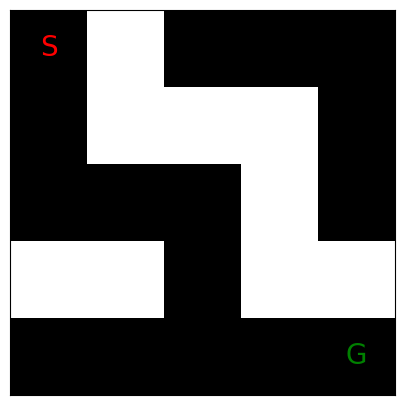

In [50]:
# Créons n'importe quelle disposition de labyrinthe que nous souhaitons, voici un exemple
maze_layout = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 1],
    [0, 0, 0, 0, 0]
])

# Créons une instance du labyrinthe et définissons les positions de départ et de but
maze = Maze(maze_layout, (0, 0), (4, 4))
# Visualisons le labyrinthe
maze.show_maze()


In [51]:
# Actions que l'agent peut effectuer : Haut, Bas, Gauche, Droite. Chaque action est représentée par un tuple de deux valeurs : (changement_ligne, changement_colonne)
actions = [(-1, 0),  # Haut : Déplacer d'un pas vers le haut, réduisant l'indice de ligne de 1
          (1, 0),    # Bas : Déplacer d'un pas vers le bas, augmentant l'indice de ligne de 1
          (0, -1),   # Gauche : Déplacer d'un pas vers la gauche, réduisant l'indice de colonne de 1
          (0, 1)]    # Droite : Déplacer d'un pas vers la droite, augmentant l'indice de colonne de 1

class QLearningAgent:
    def __init__(self, maze, learning_rate=0.1, discount_factor=0.9, exploration_start=1.0, exploration_end=0.01, num_episodes=100):
        # Initialisons l'agent Q-learning avec une table Q contenant uniquement des zéros
        # où les lignes représentent les états, les colonnes représentent les actions, et la troisième dimension est pour chaque action (Haut, Bas, Gauche, Droite)
        self.q_table = np.zeros((maze.maze_height, maze.maze_width, 4))  # 4 actions : Haut, Bas, Gauche, Droite
        self.learning_rate = learning_rate          # Le taux d'apprentissage détermine dans quelle mesure l'agent met à jour ses valeurs Q après chaque action
        self.discount_factor = discount_factor      # Le facteur de remise détermine l'importance des récompenses futures dans les décisions de l'agent
        self.exploration_start = exploration_start  # Le taux d'exploration détermine la probabilité que l'agent prenne une action aléatoire
        self.exploration_end = exploration_end
        self.num_episodes = num_episodes

    def get_exploration_rate(self, current_episode):
        # Calculons le taux d'exploration actuel en utilisant la formule donnée
        exploration_rate = self.exploration_start * (self.exploration_end / self.exploration_start) ** (current_episode / self.num_episodes)
        return exploration_rate

    def get_action(self, state, current_episode):  # L'état est un tuple représentant la position de l'agent dans le labyrinthe (x, y)
        exploration_rate = self.get_exploration_rate(current_episode)
        # Sélectionnons une action pour l'état donné soit de manière aléatoire (exploration), soit en utilisant la table Q (exploitation)
        if np.random.rand() < exploration_rate:
            return np.random.randint(4)  # Choisir une action aléatoire (index 0 à 3, représentant Haut, Bas, Gauche, Droite)
        else:
            return np.argmax(self.q_table[state])  # Choisir l'action avec la plus grande valeur Q pour l'état donné

    def update_q_table(self, state, action, next_state, reward):
        # Trouvons la meilleure action suivante en sélectionnant l'action qui maximise la valeur Q pour l'état suivant
        best_next_action = np.argmax(self.q_table[next_state])

        # Obtenons la valeur Q actuelle pour l'état et l'action donnés
        current_q_value = self.q_table[state][action]

        # Mise à jour de la valeur Q en utilisant la formule du Q-learning
        new_q_value = current_q_value + self.learning_rate * (reward + self.discount_factor * self.q_table[next_state][best_next_action] - current_q_value)

        # Mettons à jour la table Q avec la nouvelle valeur Q pour l'état et l'action donnés
        self.q_table[state][action] = new_q_value

print("Ce bloc de code a été exécuté et la classe QLearningAgent est maintenant disponible pour utilisation.")


Ce bloc de code a été exécuté et la classe QLearningAgent est maintenant disponible pour utilisation.


In [52]:
goal_reward = 100
wall_penalty = -10
step_penalty = -1

print("The reward system has been defined.")

The reward system has been defined.


In [53]:
# Cette fonction simule les mouvements de l'agent dans le labyrinthe pour un seul épisode.

def finish_episode(agent, maze, current_episode, train=True):
    # Initialisons l'état actuel de l'agent à la position de départ du labyrinthe
    current_state = maze.start_position
    is_done = False
    episode_reward = 0
    episode_step = 0
    path = [current_state]

    # Continuons jusqu'à ce que l'épisode soit terminé
    while not is_done:
        # Obtenons l'action de l'agent pour l'état actuel en utilisant sa table Q
        action = agent.get_action(current_state, current_episode)

        # Calculons l'état suivant en fonction de l'action choisie
        next_state = (current_state[0] + actions[action][0], current_state[1] + actions[action][1])

        # Vérifions si l'état suivant est hors des limites ou frappe un mur
        if next_state[0] < 0 or next_state[0] >= maze.maze_height or next_state[1] < 0 or next_state[1] >= maze.maze_width or maze.maze[next_state[1]][next_state[0]] == 1:
            reward = wall_penalty
            next_state = current_state
        # Vérifions si l'agent a atteint le but :
        elif next_state == (maze.goal_position):
            path.append(current_state)
            reward = goal_reward
            is_done = True
        # L'agent fait un pas mais n'a pas encore atteint le but
        else:
            path.append(current_state)
            reward = step_penalty

        # Mises à jour de la récompense cumulée et du nombre de pas pour l'épisode
        episode_reward += reward
        episode_step += 1

        # Mettons à jour la table Q de l'agent si l'entraînement est activé
        if train == True:
            agent.update_q_table(current_state, action, next_state, reward)

        # Passons à l'état suivant pour l'itération suivante
        current_state = next_state

    # Renvoons la récompense cumulée de l'épisode, le nombre total de pas, et le chemin de l'agent pendant la simulation
    return episode_reward, episode_step, path

print("Ce bloc de code a été exécuté et la fonction finish_episode est maintenant disponible pour utilisation.")


Ce bloc de code a été exécuté et la fonction finish_episode est maintenant disponible pour utilisation.


Chemin appris :
(0, 0)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 3)-> (2, 4)-> (2, 3)-> (2, 4)-> (2, 3)-> (2, 4)-> (2, 3)-> (2, 4)-> (2, 3)-> (2, 4)-> (3, 4)-> (2, 4)-> (2, 3)-> (2, 4)-> (1, 4)-> (2, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (2, 4)-> (2, 3)-> (2, 2)-> (1, 2)-> (2, 2)-> (2, 3)-> (2, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (2, 4)-> (3, 4)-> But atteint !
Nombre de pas : 79
Récompense totale : -329


<Figure size 640x480 with 0 Axes>

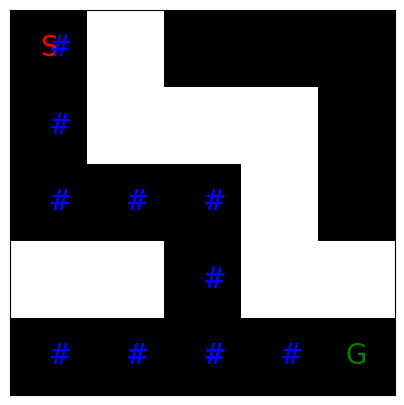

(79, -329)

In [54]:
def test_agent(agent, maze, num_episodes=1):
    # Simulons le comportement de l'agent dans le labyrinthe pour le nombre d'épisodes spécifié
    episode_reward, episode_step, path = finish_episode(agent, maze, num_episodes, train=False)

    # Imprimons le chemin appris par l'agent
    print("Chemin appris :")
    for row, col in path:
        print(f"({row}, {col})-> ", end='')
    print("But atteint !")

    print("Nombre de pas :", episode_step)
    print("Récompense totale :", episode_reward)

    # Effaçons le graphique existant s'il y en a un
    if plt.gcf().get_axes():
        plt.cla()

    # Visualisons le labyrinthe à l'aide de matplotlib
    plt.figure(figsize=(5,5))
    plt.imshow(maze.maze, cmap='gray')

    # Marquons la position de départ (S rouge) et la position du but (G verte) dans le labyrinthe
    plt.text(maze.start_position[0], maze.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
    plt.text(maze.goal_position[0], maze.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)

    # Marquons le chemin de l'agent avec des symboles '#' bleus
    for position in path:
        plt.text(position[0], position[1], "#", va='center', color='blue', fontsize=20)

    # Retirons les ticks des axes et les lignes de la grille pour une visualisation plus propre
    plt.xticks([]), plt.yticks([])
    plt.grid(color='black', linewidth=2)
    plt.show()

    return episode_step, episode_reward

agent = QLearningAgent(maze)
# Testons l'agent à l'aide de la fonction test_agent
test_agent(agent, maze)


In [57]:
def train_agent(agent, maze, num_episodes=100):
    # Listes pour stocker les données à tracer
    episode_rewards = []
    episode_steps = []

    # Bouclons sur le nombre d'épisodes spécifié
    for episode in range(num_episodes):
        episode_reward, episode_step, path = finish_episode(agent, maze, episode, train=True)

        # Stockons la récompense cumulée de l'épisode et le nombre de pas effectués dans leurs listes respectives
        episode_rewards.append(episode_reward)
        episode_steps.append(episode_step)

    # Traçons les données après la fin de l'entraînement
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(episode_rewards)
    plt.xlabel('Épisode')
    plt.ylabel('Récompense Cumulée')
    plt.title('Récompense par Épisode')

    average_reward = sum(episode_rewards) / len(episode_rewards)
    print(f"La récompense moyenne est : {average_reward}")

    plt.subplot(1, 2, 2)
    plt.plot(episode_steps)
    plt.xlabel('Épisode')
    plt.ylabel('Pas effectués')
    plt.ylim(0, 100)
    plt.title('Pas par Épisode')

    average_steps = sum(episode_steps) / len(episode_steps)
    print(f"Le nombre moyen de pas est : {average_steps}")

    plt.tight_layout()
    plt.show()

print("Ce bloc de code a été exécuté et la fonction train_agent est maintenant disponible pour une utilisation.")

Ce bloc de code a été exécuté et la fonction train_agent est maintenant disponible pour une utilisation.


La récompense moyenne est : 59.22
Le nombre moyen de pas est : 14.15


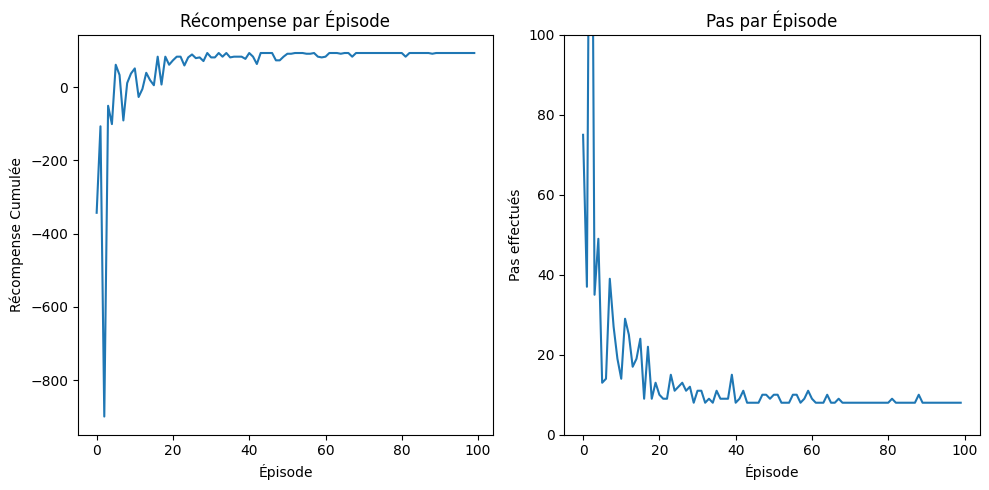

In [58]:
train_agent(agent, maze, num_episodes=100)

Chemin appris :
(0, 0)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 3)-> (2, 4)-> (3, 4)-> But atteint !
Nombre de pas : 8
Récompense totale : 93


<Figure size 640x480 with 0 Axes>

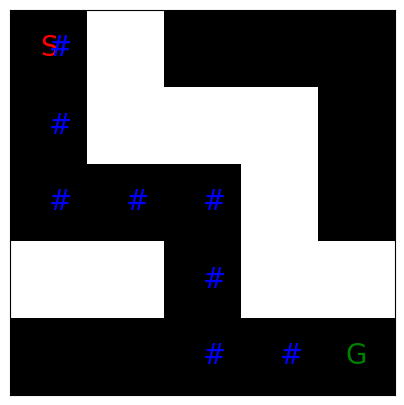

(8, 93)

In [59]:
test_agent(agent, maze, num_episodes=100)